### Import Required Libraries

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from datetime import datetime, timedelta

### Input Parameters

In [323]:
no_of_days = 1000

List_of_companies = [ 
                    "new-india-assurance-ltd",
                    "sbi-life-insurance",
                    "hdfc-standard-life"
                    ]

### Define Date Variables and Empty dataframe schema

In [324]:
Data_Dict = {"Date" : [], 
             "Price": [],
             "Open": [],
             "High": [],
             "Low": [],
             "Volume": [],
             "Chg_Percentage" : [],
             "Currency" : [],
             "Company" : []
            }

raw_data_df = pd.DataFrame(Data_Dict)


starttime = (datetime.today() - timedelta(no_of_days)).timestamp()
endtime = datetime.today().timestamp()


### Data collection --> Perform webscrapping activities using selenium and pull raw data 

In [325]:
service_obj = Service('C:/Users/Jiju/Desktop/Stock_Price_Analysis/chromedriver.exe')
driver = webdriver.Chrome(service = service_obj)

for company_name in List_of_companies:
    form_url = "https://in.investing.com/equities/{}-historical-data?end_date={}&st_date={}".format(company_name, endtime, starttime)
    driver.get(form_url)

    table_body_xpath = '//*[@id="js-main-container"]/section[2]/div/section[2]/section[2]/div[1]/div/table/tbody'
    table_body_element = driver.find_element("xpath", table_body_xpath )
    no_of_row = len(driver.find_elements("xpath", table_body_xpath + "/tr"))

    Currency_element_xpath = '//*[@id="js-main-container"]/section[2]/div/header/div/div[2]/div[1]/div[2]/span[3]'
    Currency_text = driver.find_element("xpath", Currency_element_xpath ).text  
    
    print("Total No: of rows : " , no_of_row)
    
    for date_count in range (1,no_of_row):
        Data_Dict["Date"].append(table_body_element.find_element("xpath", "//tr[{}]/td[1]/span[1]".format(date_count)).text)
        Data_Dict["Price"].append(table_body_element.find_element("xpath", "//tr[{}]/td[2]/span[1]".format(date_count)).text)
        Data_Dict["Open"].append(table_body_element.find_element("xpath", "//tr[{}]/td[3]/span[1]".format(date_count)).text)
        Data_Dict["High"].append(table_body_element.find_element("xpath", "//tr[{}]/td[4]/span[1]".format(date_count)).text)
        Data_Dict["Low"].append(table_body_element.find_element("xpath", "//tr[{}]/td[5]/span[1]".format(date_count)).text)
        Data_Dict["Volume"].append(table_body_element.find_element("xpath", "//tr[{}]/td[6]/span[1]".format(date_count)).text)
        Data_Dict["Chg_Percentage"].append(table_body_element.find_element("xpath", "//tr[{}]/td[7]/span[1]".format(date_count)).text)
        Data_Dict["Currency"].append(Currency_text)
        Data_Dict["Company"].append(company_name)

raw_data_df = pd.DataFrame(Data_Dict)
print(raw_data_df.head())

Total No: of rows :  682
Total No: of rows :  682
Total No: of rows :  682
           Date  Price   Open   High    Low   Volume Chg_Percentage Currency  \
0  Aug 03, 2022  89.50  84.20  94.50  84.20    8.25M          6.67%      INR   
1  Aug 02, 2022  83.90  83.45  84.90  83.30  528.68K          0.72%      INR   
2  Aug 01, 2022  83.30  82.80  83.60  82.20  555.96K          1.40%      INR   
3  Jul 29, 2022  82.15  81.75  82.50  81.50  460.73K          1.23%      INR   
4  Jul 28, 2022  81.15  81.85  82.30  80.90  390.72K         -0.06%      INR   

                   Company  
0  new-india-assurance-ltd  
1  new-india-assurance-ltd  
2  new-india-assurance-ltd  
3  new-india-assurance-ltd  
4  new-india-assurance-ltd  


### Data cleansing --> Format date column

In [326]:
data_df = raw_data_df
data_df['Date'] = pd.to_datetime(raw_data_df['Date'], format= '%b %d, %Y' )
print(data_df.head())

        Date  Price   Open   High    Low   Volume Chg_Percentage Currency  \
0 2022-08-03  89.50  84.20  94.50  84.20    8.25M          6.67%      INR   
1 2022-08-02  83.90  83.45  84.90  83.30  528.68K          0.72%      INR   
2 2022-08-01  83.30  82.80  83.60  82.20  555.96K          1.40%      INR   
3 2022-07-29  82.15  81.75  82.50  81.50  460.73K          1.23%      INR   
4 2022-07-28  81.15  81.85  82.30  80.90  390.72K         -0.06%      INR   

                   Company  
0  new-india-assurance-ltd  
1  new-india-assurance-ltd  
2  new-india-assurance-ltd  
3  new-india-assurance-ltd  
4  new-india-assurance-ltd  


### Data cleansing --> Clean the numeric values

In [327]:
data_df['Price'] = data_df['Price'].str.replace(',','').astype(float)
data_df['Open'] = data_df['Open'].str.replace(',','').astype(float)


### Data Visualization --> Plot the stock prices of the companies against daterange

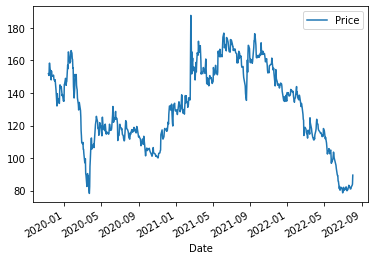

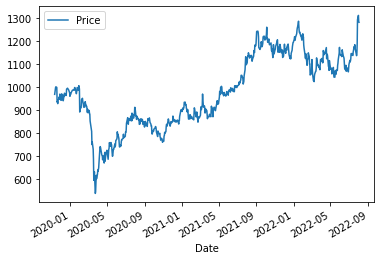

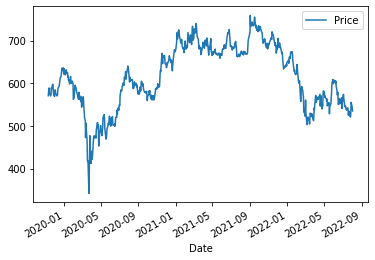

In [330]:
for x in List_of_companies:
    data_df[data_df['Company'] == x ].plot(x = 'Date', y = 'Price')